<a href="https://colab.research.google.com/github/campusplage/compte-rendus-ngauthier/blob/master/TP1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## Entrez ici vos noms et prénoms

# TP 1: `pandas` et visualisation


---
Ce notebook contient votre compte-rendu pour le TP1.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# 1. Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.

## a. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## b. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
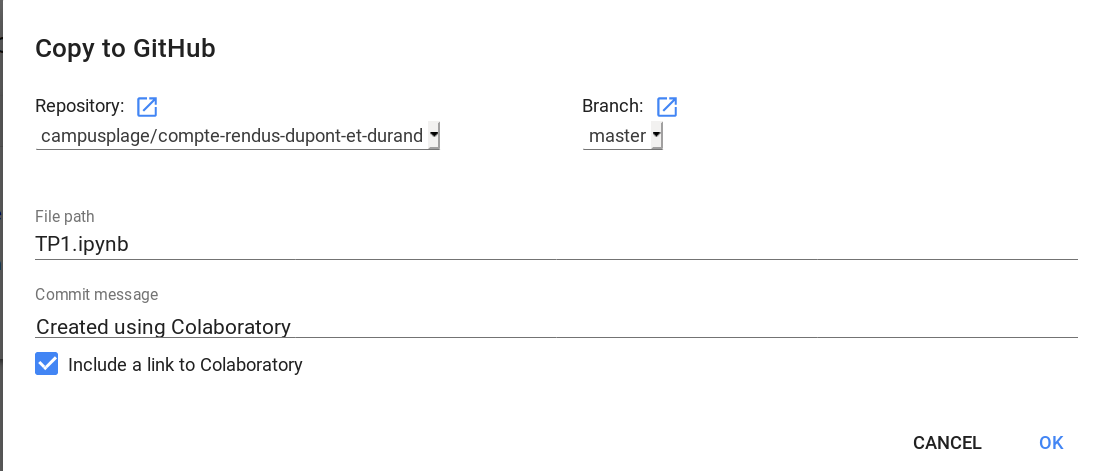

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 2. Charger des données (2 points)


1. Créez un `DataFrame` appelé `raw_data` à partir du fichier suivant:
https://husson.github.io/img/pluie.csv 
2. Renommez la première colonne `Ville` et utilisez-la en index
3. Affichez les premières lignes de la structure créée

> Modifiez la cellule suivante pour effectuer ces opérations

In [2]:
# on importe le package pandas
import pandas


# Commentez chaque ligne de code !
# VOTRE TRAVAIL ICI
raw_data = pandas.read_csv('https://husson.github.io/img/pluie.csv',
                       encoding = "ISO-8859-1", sep=';')

#le séparateur est le point virgule, et que l'encodage est spécial (pas utf-8).
raw_data = raw_data.rename(columns={raw_data.columns[0]: 'Ville'})
# On renomme la premiere colonne en "ville".
raw_data = raw_data.set_index('Ville')
# On la met maintenant en index.
raw_data.head()
#on affiche les premieres valeurs du df

,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,NOVEMBREp,DECEMBREp,Précipitations annuelles,JANVIERnb.j.pl,FEVRIERnb.j.pl,MARSnb.j.pl,AVRILnb.j.pl,MAInb.j.pl,JUINnb.j.pl,JUILLETnb.j.pl,AOUTnb.j.pl,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Latitude,Longitude,Précipitations de mai à aout,Précipitations sept-oct,Géographie
Ville,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0,653.0,12.0,10.0,9.0,9.0,8.0,4.0,1.0,2.0,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,41.55,8.44,13.9,25.8,Sud
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0,690.0,16.0,13.0,12.0,12.0,13.0,10.0,11.0,11.0,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,47.28,-0.33,29.0,30.8,Ouest
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0,826.0,16.0,14.0,13.0,12.0,14.0,11.0,12.0,12.0,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,45.39,0.09,29.9,31.0,Ouest
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0,1088.0,17.0,14.0,12.0,14.0,14.0,14.0,14.0,13.0,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,47.15,6.02,35.8,35.5,Est
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0,1474.0,16.0,14.0,13.0,15.0,17.0,14.0,13.0,13.0,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,43.29,-1.34,26.0,36.8,Ouest


Executez ensuite le code suivant, et commentez à chaque fois qu'il y a marqué "Commentez".

In [3]:
# Commentez = on creer une liste qui contient tous les mois de l'annee
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet',
          'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
type(months)
# Commentez = on creer une autre liste du type de données 
types = ['Précipitations', 'Jours de pluie']
type(types)
# Commentez =  on creer des index essayer de reformater le df de base et 2 index par rapport a chaque mois
index = pandas.MultiIndex.from_product((types, months),
                                       names=['Grandeur', 'Mois'])

# Commentez = rain_columns va permettre de servir d'indice pour la commande suivante
rain_columns = list(range(12)) + list(range(13, 25))
# on crée une DataFrame, avec un multi-index pour ces colonnes imbriquées
data = pandas.DataFrame(raw_data.iloc[:,rain_columns].to_numpy(), columns=index)
data
# Commentez Ici  : on remet l'index ville
data = data.set_index(raw_data.index)

# Commentez ici on ajoute enfin le nom des autres colonnes dans la variable 
# liste other_columns que l'on va concatener a la table data precedente avec les données brutes de base de ces colonnes la
other_columns = ['Température moyenne annuelle', 'Amplitude annuelle des températures',
                 'Insolation annuelle', 'Latitude', 'Longitude', 'Géographie']
data[other_columns] = raw_data[other_columns]

# Affichage
data.head()

Grandeur  Précipitations                ... Latitude Longitude Géographie
Mois             Janvier Février  Mars  ...                              
Ville                                   ...                              
Ajaccio             78.0    69.0  51.0  ...    41.55      8.44        Sud
Angers              65.0    50.0  60.0  ...    47.28     -0.33      Ouest
Angoulème           79.0    68.0  64.0  ...    45.39      0.09      Ouest
Besançon            94.0    87.0  75.0  ...    47.15      6.02        Est
Biarritz           128.0   105.0  98.0  ...    43.29     -1.34      Ouest

[5 rows x 30 columns]

Comme vous le constatez, `pandas` est en fait encore plus puissant que ce que je vous ai raconté: on peut avoir des index imbriqués, à la fois pour les lignes et pour les colonnes. Cela peut s'avérer très pratique pour manipuler des données réellement compliquées.

> En pratique, cela signifie qu'une colonne donnée d'un `DataFrame` n'est pas forcément un objet `Series`, contrairement à ce que je vous avais dit à des fins pédagogiques.

> Dans le code ci-dessus, on a éliminé les colonnes redondantes (qu'on peut calculer simplement à partir des données)

# 3. Indiçage (3 points)

À ce stade, vous devriez disposer d'un objet `data`, qui regroupe les données dans un `DataFrame`. 

> Dans chacune des cellules suivantes, écrivez le code nécessaire à répondre à la question posée.

In [4]:
# Affichez seulement les précipitations mensuelles de toutes les villes
data["Précipitations"]

Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
Ville,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0
Bordeaux,100.0,84.0,66.0,57.0,64.0,71.0,52.0,65.0,88.0,84.0,99.0,117.0
Brest,130.0,98.0,89.0,77.0,74.0,60.0,51.0,80.0,95.0,108.0,136.0,159.0
Caen,65.0,61.0,45.0,44.0,53.0,52.0,45.0,57.0,66.0,75.0,79.0,71.0
Clermont-Fd,28.0,27.0,30.0,41.0,78.0,79.0,48.0,70.0,58.0,43.0,39.0,30.0


In [5]:
# Affichez le nombre de jours de pluie de toutes les villes pour les mois de "Juin", "Juillet" et "Août"
data["Jours de pluie"].T["Juin":"Août"].T
# je decide de transposer les données pour selecttonner de juin a aout plus simplement.

Mois,Juin,Juillet,Août
Ville,,,
Ajaccio,4.0,1.0,2.0
Angers,10.0,11.0,11.0
Angoulème,11.0,12.0,12.0
Besançon,14.0,14.0,13.0
Biarritz,14.0,13.0,13.0
Bordeaux,11.0,11.0,12.0
Brest,13.0,14.0,15.0
Caen,12.0,13.0,13.0
Clermont-Fd,12.0,9.0,10.0


In [ ]:
# Affichez une phrase qui indique la latitude et longitude d'Angoulème.

print(data.at['Angoulème', ('Latitude','')])
print(data.at['Angoulème', ('Longitude','')] )

# (utilisez `loc` et le formattage de chaines de caractère avec print)
print('Angoulème: Latitude {} et Longitude {}'.format(data.at['Angoulème', ('Latitude','')], data.at['Angoulème', ('Longitude','')]))


45.39
0.09
Angoulème: Latitude 45.39 et Longitude 0.09


> Dans l'exemple précédent, vous aurez peut-être noté que `data.at['Angoulème', 'Longitude']` ne marche pas.  
Cela est du au fait que `data` a un multi-index pour ses colonnes. Cela signifie qu'en fait, une entrée particulière est donnée par la spécification de toutes les valeurs pour ses colonnes. Cela donnerait:
``` data.at['Angoulème', ('Longitude','')]```.  
   L'utilisation de `loc` permet de s'affranchir de cette complication.

In [6]:
# Affichez les nombres de jours de pluie mensuels de toutes les données aux villes ayant un nom compris
# entre "Montpellier" et "Paris" dans l'ordre alphabétique
data["Jours de pluie"].sort_values(by='Ville')['Montpellier':'Paris']
#sort_values permet de trier les données en fonctionne de la colonne passé en paramètre

Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
Ville,,,,,,,,,,,,
Montpellier,8.0,6.0,8.0,8.0,9.0,5.0,3.0,6.0,7.0,9.0,9.0,10.0
Nancy,16.0,13.0,12.0,13.0,13.0,13.0,12.0,13.0,12.0,13.0,15.0,16.0
Nantes,18.0,14.0,14.0,11.0,13.0,11.0,12.0,12.0,14.0,15.0,16.0,18.0
Nice,9.0,7.0,8.0,9.0,8.0,5.0,2.0,4.0,7.0,9.0,9.0,9.0
Nîmes,8.0,6.0,9.0,8.0,9.0,6.0,4.0,6.0,7.0,9.0,10.0,10.0
Orléans,16.0,13.0,12.0,12.0,13.0,11.0,11.0,12.0,12.0,13.0,15.0,16.0
Paris,17.0,14.0,12.0,13.0,12.0,12.0,12.0,13.0,13.0,13.0,15.0,16.0


In [7]:
# Affichez à la fois les précipitations mensuelles et la "Géographie" des mêmes villes 

#data.filter(regex='(Jours de pluie|Géographie)')
# On doit selectionner le first level sur multi index, on peut soit utiliser le filter en précisant le nom des first levels
# Ou alors utiliser la fontion indexSLice qui permet de slicer les index.
data.loc[:, pandas.IndexSlice[['Précipitations','Géographie'], slice(None)]]

Grandeur    Précipitations                ...                   Géographie
Mois               Janvier Février  Mars  ... Novembre Décembre           
Ville                                     ...                             
Ajaccio               78.0    69.0  51.0  ...    105.0     96.0        Sud
Angers                65.0    50.0  60.0  ...     80.0     70.0      Ouest
Angoulème             79.0    68.0  64.0  ...     79.0     88.0      Ouest
Besançon              94.0    87.0  75.0  ...     92.0     93.0        Est
Biarritz             128.0   105.0  98.0  ...    175.0    176.0      Ouest
Bordeaux             100.0    84.0  66.0  ...     99.0    117.0      Ouest
Brest                130.0    98.0  89.0  ...    136.0    159.0      Ouest
Caen                  65.0    61.0  45.0  ...     79.0     71.0       Nord
Clermont-Fd           28.0    27.0  30.0  ...     39.0     30.0        Est
Dijon                 62.0    48.0  51.0  ...     67.0     61.0        Est
Embrun                61.0    55.0  55.0  ...     81.0     62.0        Sud
Grenoble              80.0    79.0  69.0  ...     90.0     98.0        Est
Lille                 45.0    43.0  38.0  ...     56.0     56.0       Nord
Limoges               87.0    75.0  68.0  ...     82.0     98.0      Ouest
Lyon                  53.0    50.0  60.0  ...     80.0     62.0        Est
Marseille             36.0    49.0  40.0  ...     69.0     61.0        Sud
Montpellier           56.0    59.0  69.0  ...     70.0     73.0        Sud
Nancy                 66.0    58.0  43.0  ...     59.0     67.0        Est
Nantes                83.0    65.0  53.0  ...     95.0     94.0      Ouest
Nice                  67.0    83.0  71.0  ...    158.0     92.0        Sud
Nîmes                 52.0    53.0  57.0  ...     83.0     60.0        Sud
Orléans               57.0    48.0  43.0  ...     61.0     54.0      Ouest
Paris                 53.0    48.0  40.0  ...     58.0     51.0       Nord
Perpignan             27.0    52.0  59.0  ...     70.0     71.0        Sud
Poitiers              65.0    58.0  56.0  ...     78.0     68.0      Ouest
Reims                 43.0    44.0  42.0  ...     52.0     50.0        Est
Rennes                57.0    50.0  45.0  ...     73.0     66.0      Ouest
Rouen                 65.0    58.0  50.0  ...     68.0     66.0       Nord
St-Quentin            52.0    50.0  46.0  ...     63.0     65.0       Nord
Strasbourg            51.0    44.0  42.0  ...     51.0     47.0        Est
Toulon                76.0    86.0  82.0  ...    117.0    107.0        Sud
Toulouse              53.0    50.0  52.0  ...     58.0     65.0        Sud
Tours                 63.0    55.0  52.0  ...     68.0     65.0      Ouest
Vichy                 50.0    45.0  51.0  ...     58.0     55.0        Est

[34 rows x 13 columns]

In [ ]:
# Affichez les trois dernières colonnes de la table pour les 15 premières villes
data.iloc[:15,-3:]


Grandeur,Latitude,Longitude,Géographie
Mois,,,
Ville,,,
Ajaccio,41.55,8.44,Sud
Angers,47.28,-0.33,Ouest
Angoulème,45.39,0.09,Ouest
Besançon,47.15,6.02,Est
Biarritz,43.29,-1.34,Ouest
Bordeaux,44.50,-0.34,Ouest
Brest,48.24,-4.29,Ouest
Caen,49.11,-0.21,Nord


# 4. Réorganisation et pivotage  (4 points)


## a. Groupage des niveaux dans un `MultiIndex`


On dispose d'un objet `data` qui a un MultiIndex sur ses colonnes.

Plutôt que de stocker des données redondantes comme dans les données initiales (colonnes 'Nombre annuel de jours de pluie' ou 'Précipitations sept-oct' par exemple), il est plus judicieux de les calculer à la demande.

Une fois encore, `pandas` dispose de nombreux moyens de regrouper, agrégrer, réorganiser les données.

Dans notre exemple, on peut facilement réunir toutes les données mensuelles, pour calculer les précipitations et nombres de jours de pluie annuels.  
Cela se fait avec la fonction [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). En l'occurrence, on voit que le paramètre `level` correspond exactement à ce qu'on cherche

In [9]:
grouped_data = data.groupby(axis=1, level='Grandeur')


En fait, `groupby` retourne des __groupes__ sur les données. Ici par exemple, toutes les valeurs de précipitations de nombres de jours de pluie sont groupées.

Ce qui est renvoyé par `groupby` est ici un objet de type `DataFrameGroupBy`, tel que décrit [ici](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html). 
Pour rentrer un peu dans les détails, on peut afficher les groupes créés.

In [10]:
# par une petite boucle sur les différents groupes créés, on peut en afficher le nom
for group in grouped_data.groups:
  print(group)

Amplitude annuelle des températures
Géographie
Insolation annuelle
Jours de pluie
Latitude
Longitude
Précipitations
Température moyenne annuelle


Et ici, on est simplement intéressés par le total au sein de chaque groupe. Il suffit d'appliquer la fonction `max`.

In [11]:
# Afficher pour toutes les villes le nombre annuel de jours de pluie et les précipitations annuelles.
valPrec = grouped_data.get_group('Précipitations').sum(axis=1)
valPluie = grouped_data.get_group('Jours de pluie').sum(axis=1)

In [12]:
# Comparer avec les colonnes correspondantes de `raw_data`. 
raw_data
# vous pouvez utiliser `to_numpy` et l'opérateur de comparaison `==`
raw_data["Précipitations annuelles"].to_numpy() == valPrec.to_numpy()
raw_data["Nombre annuel de jours de pluie"].to_numpy() == valPluie.to_numpy()
# cela doit nous renvoyer un array de true si les données sont equivalentes et c'est le cas.


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

Maintenant, recalculez-vous même les cumuls de précipitations et de jours de pluie de mai à août.

> Pour vous aider, regardez ce que donne:  
  `data.loc[:,(['Précipitations','Jours de pluie'], [None, 'Janvier','Mars'])]`

In [ ]:
# cumul des précipitations et du nombre de jours de pluie de mai à août
pandas.concat([grouped_data.get_group('Précipitations').iloc[:,4:8].sum(axis=1), grouped_data.get_group('Jours de pluie').iloc[:,4:8].sum(axis=1)], axis=1)
#data.loc[:,(['Précipitations'], [None, 'Mai','Juin','Juillet','Août'])].sum(axis=1)

,0,1
Ville,,
Ajaccio,91.0,15.0
Angers,200.0,45.0
Angoulème,247.0,49.0
Besançon,389.0,55.0
Biarritz,383.0,57.0
Bordeaux,252.0,48.0
Brest,265.0,56.0
Caen,207.0,52.0
Clermont-Fd,275.0,43.0


## b. Pivotage




En partant de la table initiale, génerer une table ressemblant à:



| |Ville | Grandeur | Mois | Valeur |
|-|------|----------|------|--------|
|0|Ajaccio|Précipitations|Janvier|78.0|
|1|Angers|Précipitations|Janvier|65.0|
...
|814|Tours|Jours de pluie|Décembre|16.0|
|815|Vichy|Jours de pluie|Décembre|16.0|

> _Conseil_: utilisez `melt`

In [13]:
col = data.columns.to_list()
# Col represente la liste des colonnes et nous voulons pour la suite les valeurs correspondantes a Jours de pluie et Precipitations.
col
# On effectue le pivot avec idvars pour l'index, value_vars : les colonnes de prec et jdp et enfin le nom des valeurs "Valeurs"
data.reset_index().melt(id_vars=[('Ville',"")], value_vars = col[:-6], value_name= 'Valeurs', ) 

,"(Ville, )",Grandeur,Mois,Valeurs
0,Ajaccio,Précipitations,Janvier,78.0
1,Angers,Précipitations,Janvier,65.0
2,Angoulème,Précipitations,Janvier,79.0
3,Besançon,Précipitations,Janvier,94.0
4,Biarritz,Précipitations,Janvier,128.0
...,...,...,...,...
811,Strasbourg,Jours de pluie,Décembre,14.0
812,Toulon,Jours de pluie,Décembre,11.0
813,Toulouse,Jours de pluie,Décembre,14.0
814,Tours,Jours de pluie,Décembre,16.0


À présent, génerer une table ressemblant à:

| |Ville | Géographie | Grandeur | Mois | Valeur |
|-|------|------------|----------|------|--------|
|0|Ajaccio|Sud|Précipitations|Janvier|78.0|
|1|Angers|Ouest|Précipitations|Janvier|65.0|
...
|814|Tours|Ouest|Jours de pluie|Décembre|16.0|
|815|Vichy|Est|Jours de pluie|Décembre|16.0|

> _Conseil_: dans `melt`, le paramètre `index` peut être une liste...

In [16]:
# deuxième pivot

col = data.columns.to_list()
#On met ici une liste en index de sorte a avoir les grandeurs/ Mois / Valeurs en fonctions de cette index
dat = data.reset_index().melt(id_vars=[('Ville',""),('Géographie',"")], value_vars = col[:-6], value_name= 'Valeurs', ) 
#On renomme les colonnes de sorte a ce que ce soit plus simple par la suite
dat.columns = ["Ville", "Géographie","Grandeur","Mois","Valeurs"]
dat


,Ville,Géographie,Grandeur,Mois,Valeurs
0,Ajaccio,Sud,Précipitations,Janvier,78.0
1,Angers,Ouest,Précipitations,Janvier,65.0
2,Angoulème,Ouest,Précipitations,Janvier,79.0
3,Besançon,Est,Précipitations,Janvier,94.0
4,Biarritz,Ouest,Précipitations,Janvier,128.0
...,...,...,...,...,...
811,Strasbourg,Est,Jours de pluie,Décembre,14.0
812,Toulon,Sud,Jours de pluie,Décembre,11.0
813,Toulouse,Sud,Jours de pluie,Décembre,14.0
814,Tours,Ouest,Jours de pluie,Décembre,16.0


Affichez les précipitations mensuelles moyennes pour chaque zone géographique

> conseil: utilisez `pivot_table`

In [17]:
# précipitations mensuelles moyennes
dat.iloc[:,0]
# On recupere dans le dataset crée la partie des valeurs Précipitations
dat2 = dat[dat["Grandeur"] == "Précipitations"]
aggregated = dat2.pivot_table(values="Valeurs",columns="Mois", index="Géographie",aggfunc='mean')
aggregated

Mois,Août,Avril,Décembre,Février,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre
Géographie,,,,,,,,,,,,
Est,86.111111,53.111111,62.555556,53.555556,58.555556,60.222222,82.000000,72.333333,51.444444,65.333333,58.666667,74.111111
Nord,63.600000,42.800000,61.800000,52.000000,56.000000,54.200000,57.200000,50.600000,43.800000,64.800000,61.000000,62.000000
Ouest,69.363636,59.000000,95.909091,68.727273,83.090909,48.545455,61.181818,62.727273,63.090909,93.272727,78.000000,76.818182
Sud,37.666667,49.444444,76.333333,61.777778,56.222222,23.666667,41.111111,47.444444,59.555556,90.111111,88.111111,67.444444


# 5. Visualisation (6 points)

## a. boxplot et violinplot

Dans la dernière partie de ce compte rendu, nous allons afficher des figures permettant de visualiser les données.

Commencez par afficher des boîte à moustache donnant pour chaque mois la distribution du nombre de jours de pluie sur l'ensemble des villes.
Le résultat doit ressembler à:
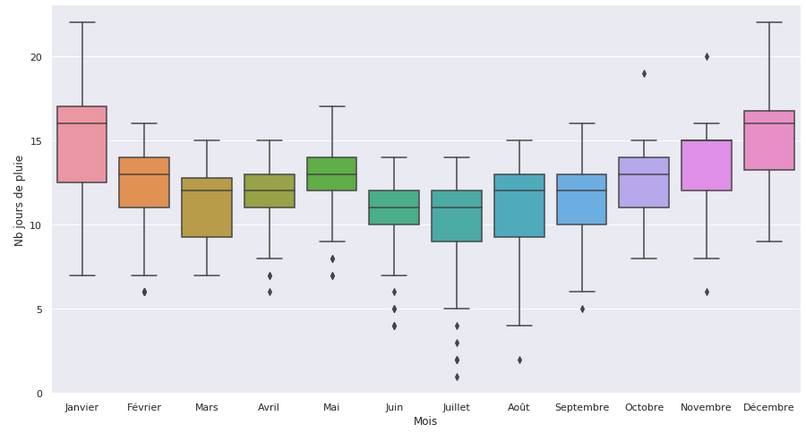

> conseil: utiliser le résultat des questions précédentes (celles avec `melt`)

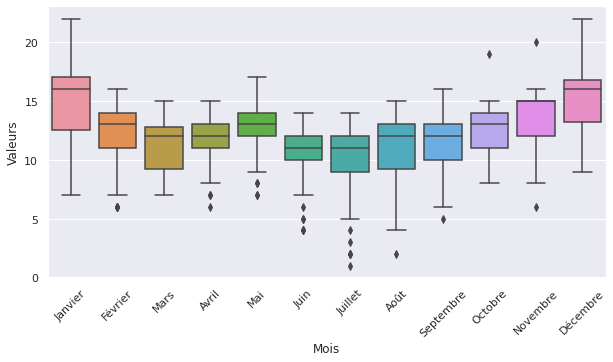

In [ ]:
# Distribution mensuelle des nombres de jours de pluie...
import seaborn as sns
sns.set()

# VOTRE CODE ICI
dat3 = dat[dat["Grandeur"] == "Jours de pluie"]
g = sns.boxplot(x='Mois', y='Valeurs', data=dat3);

# on tourne les labels pour que ça soit plus joli
for item in g.get_xticklabels():
    item.set_rotation(45)

g.get_figure().set_size_inches(10,5)

Sophistiquez l'affichage précédent pour que les distributions se fassent en fonction de la zone géographique. Le résultat doit ressembler à:

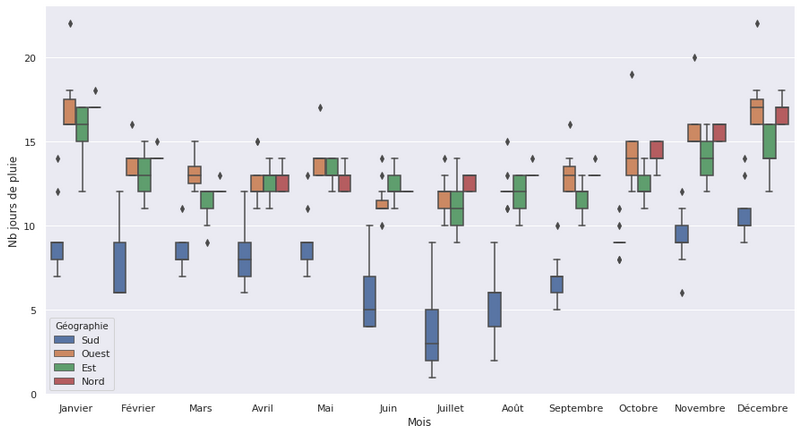

> _conseil_: utilisez le paramètre `by` de [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) 

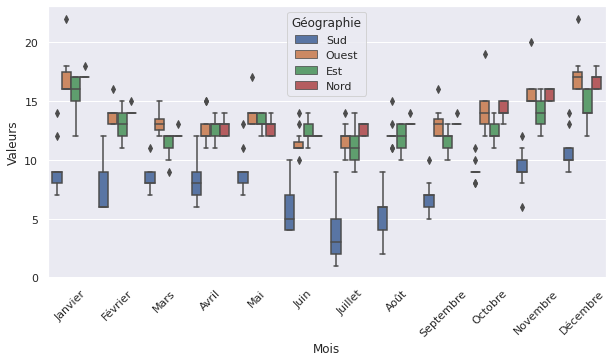

In [ ]:
# boxplot par différentes zones géographiques....

# VOTRE CODE ICI
# On recupere dans le dataset crée la partie des valeurs jours de pluie
#boxplot permet de faire la boîte a moustache, hue va nous permettre de colorer le graph en fonction des valeurs de la colonne géographie
dat3 = dat[dat["Grandeur"] == "Jours de pluie"]
g = sns.boxplot(x='Mois', y='Valeurs', data=dat3,hue="Géographie");

# on tourne les labels pour que ça soit plus joli
for item in g.get_xticklabels():
    item.set_rotation(45)

g.get_figure().set_size_inches(10,5)

Enfin, affichez la distribution marginale des précipitations en fonction de la zone géographique.

Le résultat doit ressembler à:


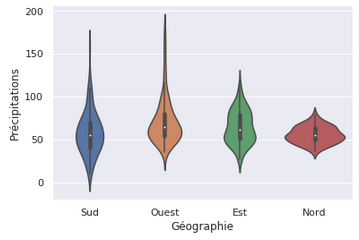

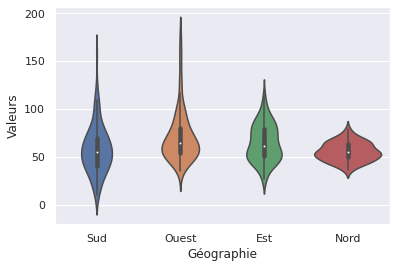

In [ ]:
# Affichage de la distribution marginale des précipitations par zone géographique

# affichage du violinplot
g = sns.violinplot(data=dat2, x='Géographie', y='Valeurs')



## b. Affichages extras (points bonus)

> Cette section est à faire tout à la fin, quand vous aurez traité l'ensemble des TPs de ce cours.

Réalisez toute sorte d'affichage sur ces données que vous pourriez trouver joli et utile. La qualité des affichages et la difficulté pour les réalisée sera prise en compte dans la notation !


Ci-dessous, un exemple, mais soyez créatifs !!

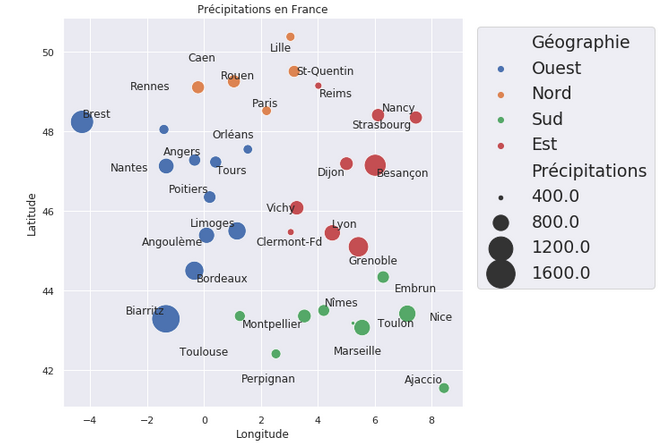

[Text(0, 0.5, 'Jours de pluie')]

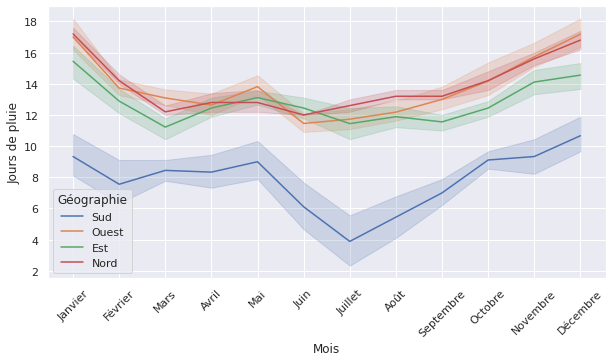

In [ ]:
# Graphique montrant la tendence des jours de pluie en fonction des mois de l'année.
g = sns.lineplot(x="Mois", y="Valeurs",
             hue="Géographie",
             data=dat3)
for item in g.get_xticklabels():
    item.set_rotation(45)

g.get_figure().set_size_inches(10,5)
g.set(ylabel='Jours de pluie')

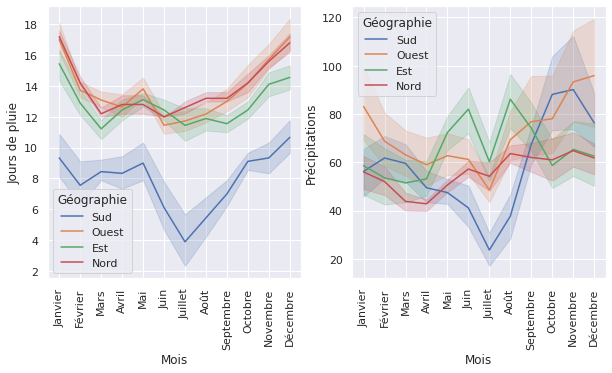

In [ ]:
#Graphique montrant d'une part, la tendence des jours de pluie, d'autre part,
#la tendence des précipitations en fonction des mois de l'année.
import matplotlib.pyplot as plt
fig, ax =plt.subplots(1,2)

g = sns.lineplot(x="Mois", y="Valeurs",
             hue="Géographie",
             data=dat3, ax=ax[0])
for item in g.get_xticklabels():
    item.set_rotation(90)
g.set(ylabel='Jours de pluie')
g.get_figure().set_size_inches(10,5)

g2 = sns.lineplot(x="Mois", y="Valeurs",
             hue="Géographie",
             data=dat2, ax=ax[1])
for item in g2.get_xticklabels():
    item.set_rotation(90)

g2.get_figure().set_size_inches(10,5)
g2.set(ylabel='Précipitations')
fig.show()

In [ ]:
col = data.columns.to_list()
#On met ici une liste en index de sorte a avoir les grandeurs/ Mois / Valeurs en fonctions de cette index
df = data.reset_index().melt(id_vars=[('Ville',""),('Latitude',""),('Longitude',""),('Géographie',"")], value_vars = col[:-6], value_name= 'Valeurs', ) 
df
#On renomme les colonnes de sorte a ce que ce soit plus simple par la suite
df.columns = ["Ville", "Latitude","Longitude","Géographie","Grandeur","Mois","Valeurs"]
dfPrec = df[df["Grandeur"] == "Précipitations"]
dfPluie = df[df["Grandeur"] == "Jours de pluie"]

In [ ]:
dfPrec.shape[0]

408

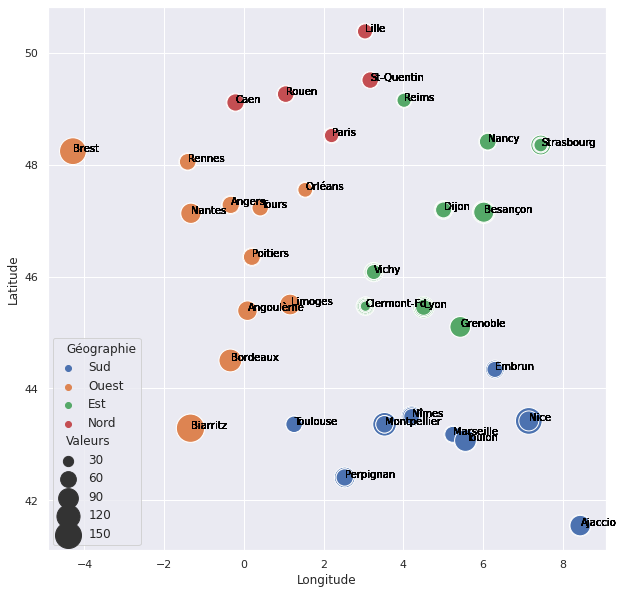

In [ ]:
#Graphique representant les villes de france et le taux de precipitation.
g = sns.scatterplot(data=dfPrec, x="Longitude", y="Latitude",hue="Géographie",
                    size="Valeurs",sizes=(10, 800))
# Boucle qui nous permet d'afficher le texte des villes sur le graph en fonction de la latitute et la longitude de chaque point.
for line in range(0,dfPrec.shape[0]):
     g.text(dfPrec.Longitude[line]+0.01, dfPrec.Latitude[line], 
     dfPrec.Ville[line], horizontalalignment='left', 
     size='small', color='black')

g.get_figure().set_size_inches(10,10)